In [1]:
import pandas as pd
import numpy as np

np.random.seed(42)
n_records = 1000

data = {
    'Date': pd.date_range(start='2025-01-01', periods=n_records, freq='D'),
    'Region': np.random.choice(['North America', 'Europe', 'APAC', 'LATAM'], n_records),
    'Department': np.random.choice(['Logistics', 'R&D', 'Sales', 'IT Operations', 'Admin'], n_records),
}

df = pd.DataFrame(data)
df['Gross_Revenue'] = np.random.uniform(5000, 20000, n_records)

df['Logistics_Cost'] = df.apply(lambda x: np.random.uniform(500, 2000) if x['Department'] == 'Logistics' else 0, axis=1)
df['Software_Licenses'] = df.apply(lambda x: np.random.uniform(300, 1200) if x['Department'] == 'IT Operations' else 0, axis=1)
df['Marketing_Spend'] = df.apply(lambda x: np.random.uniform(1000, 4000) if x['Department'] == 'Sales' else 0, axis=1)
df['Office_Admin_Expenses'] = np.random.uniform(200, 800, n_records) # Fixed base costs for all

df['Total_OpEx'] = df['Logistics_Cost'] + df['Software_Licenses'] + df['Marketing_Spend'] + df['Office_Admin_Expenses']
df['Net_Profit'] = df['Gross_Revenue'] - df['Total_OpEx']

df['Profit_Margin_Pct'] = (df['Net_Profit'] / df['Gross_Revenue']) * 100

df.to_csv('Operational_Costs_Analysis.csv', index=False)
print("Operational Costs Dataset Generated!")

Operational Costs Dataset Generated!


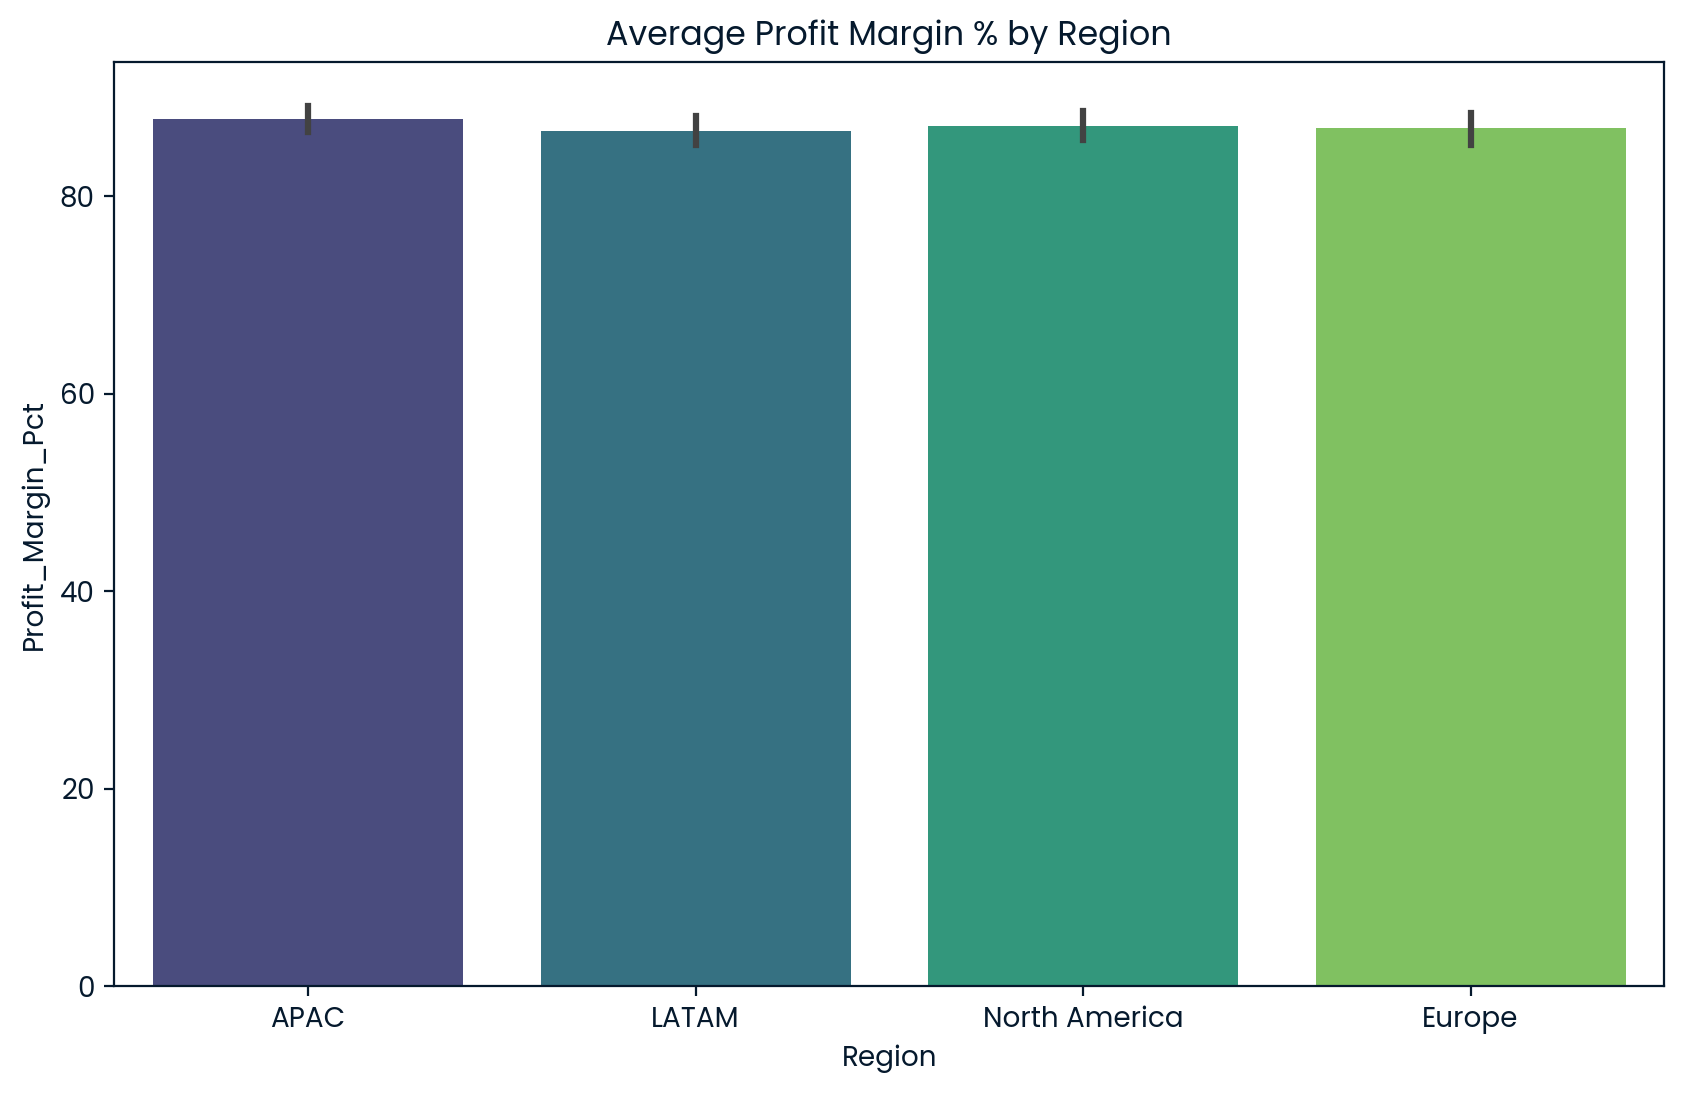

Total Operational Expenses by Department:
Department
Sales            613599.132394
Logistics        366026.083188
IT Operations    211572.516076
Admin            103603.564126
R&D              102351.331509
Name: Total_OpEx, dtype: float64

Correlation between Revenue and Net Profit: 0.97


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Operational_Costs_Analysis.csv')

plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Region', y='Profit_Margin_Pct', palette='viridis')
plt.title('Average Profit Margin % by Region')
plt.show()

dept_costs = df.groupby('Department')['Total_OpEx'].sum().sort_values(ascending=False)
print("Total Operational Expenses by Department:")
print(dept_costs)

correlation = df['Gross_Revenue'].corr(df['Net_Profit'])
print(f"\nCorrelation between Revenue and Net Profit: {correlation:.2f}")

In [5]:
sql_summary = df.groupby(['Region', 'Department']).agg(
    Total_Revenue=('Gross_Revenue', 'sum'),
    Total_Expenses=('Total_OpEx', 'sum'),
    Net_Profit=('Net_Profit', 'sum')
).reset_index()
sql_summary['Profit_Margin_Percentage'] = (sql_summary['Net_Profit'] / sql_summary['Total_Revenue']) * 100
sql_summary = sql_summary.sort_values(by='Profit_Margin_Percentage', ascending=False).round(2)